In [1]:
from typing import Union, List, Any, Optional, Dict

import os
import re
import time
import json
import glob
import pickle
import random
import urllib
import requests
import subprocess
import concurrent.futures

import numpy as np

from tqdm import tqdm
from pathlib import Path


from utils import cleaning_utils
from utils import cluster_utils
from utils import IDF_computation
from utils import embedding_utils as embedding
from utils.customdocument import CustomDocument

In [2]:
clustering_type = "sklearn"
clustering_files = glob.glob(f'output/{clustering_type}_*.pkl')

Computing elbow and silhouette (if not too many num_clusters) scores.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1737.27it/s]

Loading values from existing csv file: output/sklearn_4500_clusters.pkl
Loading values from existing csv file: output/sklearn_5000_clusters.pkl
Loading values from existing csv file: output/sklearn_3500_clusters.pkl
Loading values from existing csv file: output/sklearn_2000_clusters.pkl
Loading values from existing csv file: output/sklearn_500_clusters.pkl
Loading values from existing csv file: output/sklearn_2500_clusters.pkl
Loading values from existing csv file: output/sklearn_3000_clusters.pkl
Loading values from existing csv file: output/sklearn_5500_clusters.pkl
Loading values from existing csv file: output/sklearn_4000_clusters.pkl
Loading values from existing csv file: output/sklearn_1000_clusters.pkl
Loading values from existing csv file: output/sklearn_7500_clusters.pkl
Loading values from existing csv file: output/sklearn_6000_clusters.pkl
Loading values from existing csv file: output/sklearn_6500_clusters.pkl
Loading values from existing csv file: output/sklearn_7000_cluste

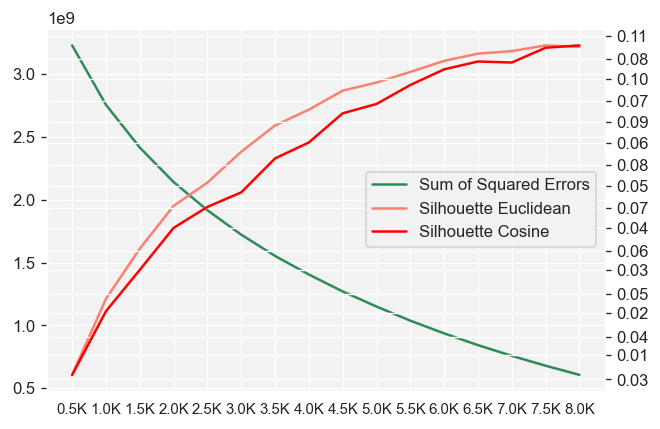

In [3]:
# This takes a bit of time; 6-10 minutes per cluster size for 2000-6000 clusters 
# but resulting scores are saved in a csv and reused
clustering_data_fp = "output/"
es = cluster_utils.ElbowAndSilhouette(clustering_data_fp)
es.compute_scores_for_models(clustering_type, clustering_files)